# Download necessary packages

In [1]:
# Download the necessary packages for YOLO
# Resource: MSBA- 503: Object Detection (YOLO).ipynb

!pip install ultralytics
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Download the necessary model for YOLO
model = YOLO("yolov8m.pt")

In [2]:
# Download the necessary packages for RCNN
# Resource: MSBA- 503: Object Detection (Faster RCNN).ipynb

import torch
import torchvision.transforms.functional as F
import torchvision.models.detection as detection
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
#We will use the pre-trained FasterRCNN_ResNet50_FPN model. This model is trained with the COCO dataset
#Let us see the COCO dataset classes. These classes will be printed in the image
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights

# Download the pre-trained Faster R-CNN model
model_rcnn = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_rcnn.eval()

# Load the metadata for the pre-trained model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
COCO_CLASSES = weights.meta["categories"]  # Fetch the class names dynamically

print(COCO_CLASSES)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Choose and upload 5 images

In [3]:
# Upload images to the colab environment from my desktop.

from google.colab import files
uploaded = files.upload()
image_files = list(uploaded.keys())
for image_file in image_files:
  print(f"Uploaded: {image_file}")

In [4]:
# Save downloaded images for easy referencing in later code.
image_1 = Image.open("img_brocolli_and_carrots.jpeg")
image_2 = Image.open("img_airplane_and_bird.jpeg")
image_3 = Image.open("img_dog.jpg")
image_4 = Image.open("img_dog_couch.jpeg")
image_5 = Image.open("img_bus_and_person.jpeg")

# Object Detection (YOLO)

**Resources:**
*   **MSBA - 503: Object Detection (YOLO).ipynb** - This resource was used to obtain the foundational coding to run the model.
*   **ChatGPT** - To find a optimal way to rerun it for all 5 images.





0: 480x640 2 spoons, 1 bowl, 1 broccoli, 3 carrots, 1 dining table, 2300.2ms
Speed: 5.9ms preprocess, 2300.2ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


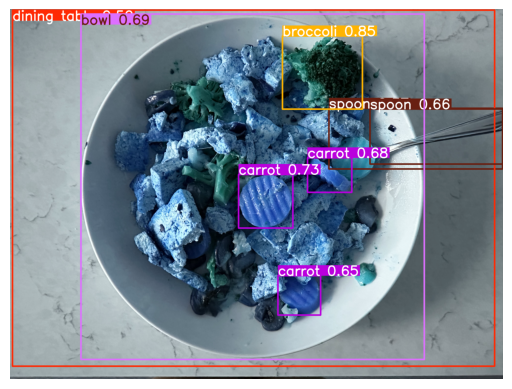


0: 480x640 5 airplanes, 1079.2ms
Speed: 3.8ms preprocess, 1079.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


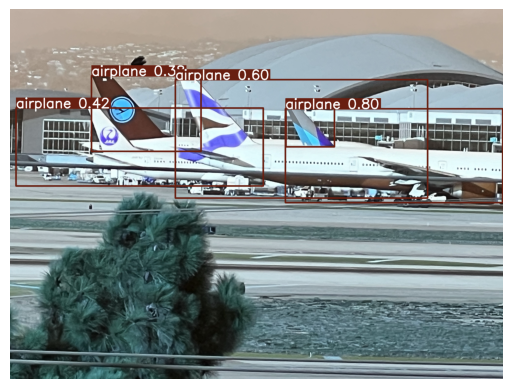


0: 640x544 1 dog, 1341.0ms
Speed: 4.4ms preprocess, 1341.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 544)


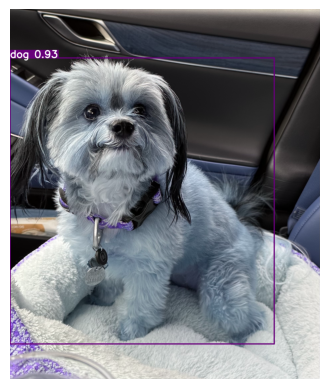


0: 480x640 1 dog, 1 couch, 1653.0ms
Speed: 5.5ms preprocess, 1653.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


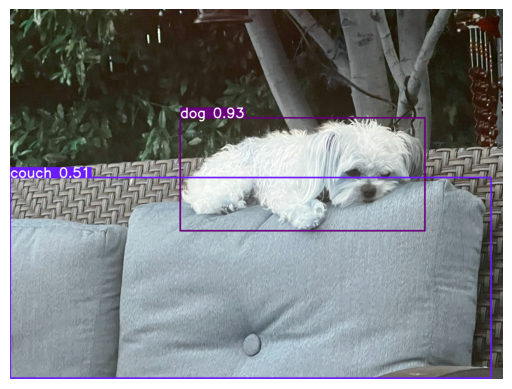


0: 480x640 1 person, 1 bus, 1 umbrella, 1067.6ms
Speed: 4.2ms preprocess, 1067.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


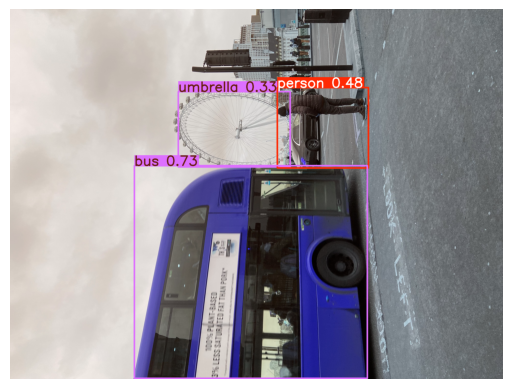

In [5]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display  # If using Jupyter or IPython

# List of images to process (replace with actual image variables or file paths)
image_paths = [image_1, image_2, image_3, image_4, image_5]  # Replace with image file paths if needed

# Initialize an empty list to store results
results_table = []

# Loop over each image
for idx, image_path in enumerate(image_paths, start=1):
    # Start the timer
    start_time = time.time()

    # Load and predict the image
    results = model.predict(image_path)  # Assuming 'model.predict' works with paths directly.

    # Get the prediction result
    result = results[0]  # The result contains detected objects

    # Display the image with predictions
    annotated_image = result.plot()
    plt.imshow(annotated_image)
    plt.axis('off')  # Turn off the axes for better visualization
    plt.show()

    # Save the image with annotations
    annotated_image_pil = Image.fromarray(annotated_image)
    annotated_image_filename = f"img_{idx}_annotated.jpeg"
    annotated_image_pil.save(annotated_image_filename)

    # Generate the list of detected objects with their probabilities
    detected_objects = []
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        conf = round(box.conf[0].item(), 2)
        detected_objects.append(f"{class_id} ({conf})")

    # Calculate and print the time it took to process this image
    end_time = time.time()
    elapsed_time = round(end_time - start_time, 2)

    # Append the details for this image to the results table
    results_table.append({
        'Image': f"img_{idx}.jpg",  # You can change this to the image name or path
        'Object Types': ', '.join(detected_objects),  # Join detected objects into a single string
        'Time Taken (seconds)': elapsed_time
    })




In [6]:
# Convert the list of results to a DataFrame
df_YOLO = pd.DataFrame(results_table)

# Display the table
display(df_YOLO)

Image                                       Object Types  \
0  img_1.jpg  broccoli (0.85), carrot (0.73), bowl (0.69), c...   
1  img_2.jpg  airplane (0.8), airplane (0.6), airplane (0.42...   
2  img_3.jpg                                         dog (0.93)   
3  img_4.jpg                           dog (0.93), couch (0.51)   
4  img_5.jpg         bus (0.73), person (0.48), umbrella (0.33)   

   Time Taken (seconds)  
0                  7.26  
1                  3.63  
2                  2.50  
3                  3.93  
4                  3.19

# Object Detection (Faster RCNN)

**Resources:**
*   **MSBA - 503: Object Detection (RCNN).ipynb** - This resource is used to obtain the foundational coding to run the model.
*   **ChatGPT** - To find a optimal way to rerun it for all 5 images.




In [7]:
# Resave the photos with image_? names due to the saving that took place in running YOLO.
# Save downloaded images for easy referencing in later code.
image_1 = Image.open("img_brocolli_and_carrots.jpeg")
image_2 = Image.open("img_airplane_and_bird.jpeg")
image_3 = Image.open("img_dog.jpg")
image_4 = Image.open("img_dog_couch.jpeg")
image_5 = Image.open("img_bus_and_person.jpeg")

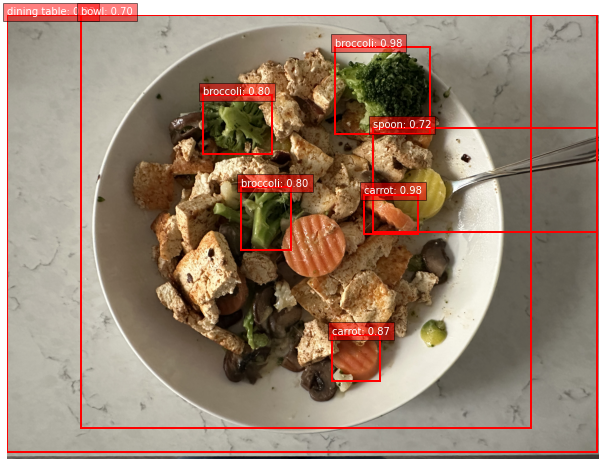

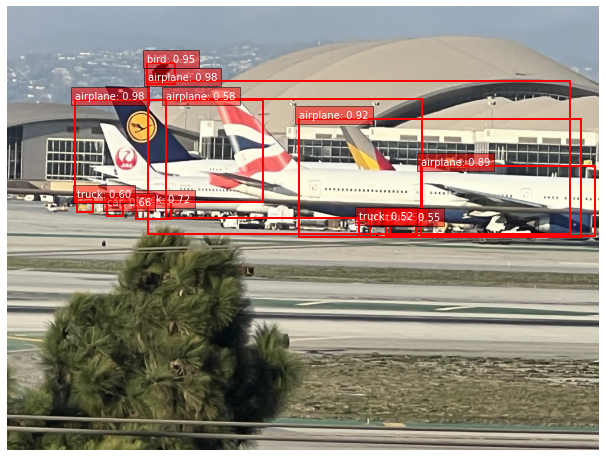

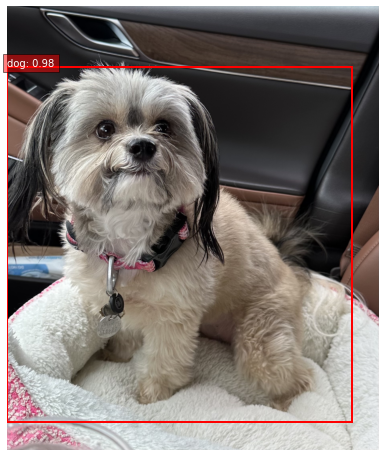

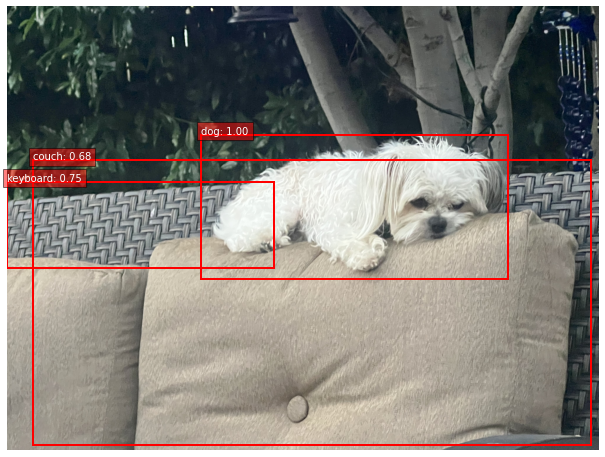

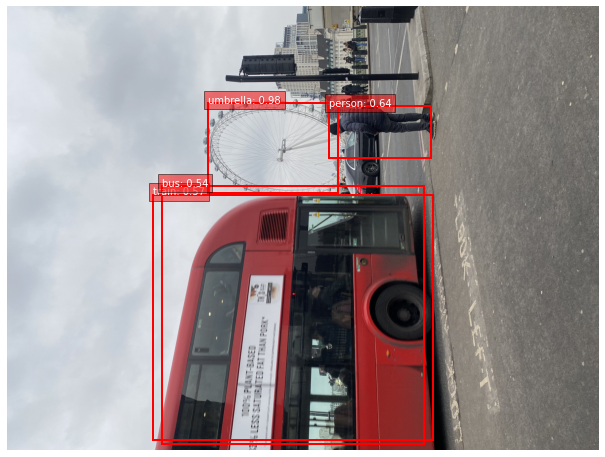

In [10]:
from torchvision import transforms as T  # Fix for 'T' import

# List of images to process (replace these with the actual PIL image objects or file paths)
image_paths = [image_1, image_2, image_3, image_4, image_5]  # List of images already loaded or paths

# Initialize an empty list to store results
results_table = []

# Loop over each image
for idx, image_path in enumerate(image_paths, start=1):
    # Start the timer
    start_time = time.time()

    # Check if image_path is already a PIL image or path
    if isinstance(image_path, Image.Image):
        image = image_path  # Use the already loaded PIL image
    else:
        image = Image.open(image_path)  # Load image from file path

    # Convert the image to a tensor
    image_tensor = T.ToTensor()(image).unsqueeze(0)  # Add batch dimension (1, C, H, W)

    # Perform object detection
    with torch.no_grad():
        predictions = model_rcnn(image_tensor)  # Run the image through the model

    # Extract predictions
    predicted_boxes = predictions[0]['boxes']  # Bounding boxes
    predicted_scores = predictions[0]['scores']  # Confidence scores
    predicted_labels = predictions[0]['labels']  # Class indices

    # Filter predictions by confidence threshold
    confidence_threshold = 0.5
    filtered_boxes = []
    filtered_scores = []
    filtered_labels = []

    for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
        if score >= confidence_threshold:
            filtered_boxes.append(box)
            filtered_scores.append(score)
            filtered_labels.append(label)

    # Annotate the image with bounding boxes and class names
    fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
    ax.imshow(image)

    # Initialize list to store detected objects with confidence scores
    detected_objects = []

    for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
        x_min, y_min, x_max, y_max = box.tolist()
        class_name = COCO_CLASSES[label.item()]  # Map label to class name

        # Draw the bounding box
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)

        # Add the class name and score as text
        ax.text(
            x_min,
            y_min - 5,
            f"{class_name}: {score:.2f}",
            color='white',
            fontsize=10,
            bbox=dict(facecolor='red', alpha=0.5)
        )

        # Add the object with confidence to the list
        detected_objects.append(f"{class_name} ({score:.2f})")

    # Hide axes for better visualization
    plt.axis("off")
    # Display the annotated image
    plt.show()

    # Save the image with annotations
    annotated_image_filename = f"img_{idx}_annotated.jpeg"
    fig.savefig(annotated_image_filename, bbox_inches='tight', pad_inches=0)

    # Calculate and print the time it took to process this image
    end_time = time.time()
    elapsed_time = round(end_time - start_time, 2)

    # Append the details for this image to the results table
    results_table.append({
        'Image': annotated_image_filename,
        'Object Types': ', '.join(detected_objects),  # Join detected objects into a single string
        'Time Taken (seconds)': elapsed_time
    })



In [15]:
# Convert the list of results to a DataFrame
df_RCNN = pd.DataFrame(results_table)

# Display the table
display(df_RCNN)

Image                                       Object Types  \
0  img_1_annotated.jpeg  carrot (0.98), broccoli (0.98), dining table (...   
1  img_2_annotated.jpeg  airplane (0.98), airplane (0.98), bird (0.95),...   
2  img_3_annotated.jpeg                                         dog (0.98)   
3  img_4_annotated.jpeg          dog (1.00), keyboard (0.75), couch (0.68)   
4  img_5_annotated.jpeg  umbrella (0.98), person (0.64), train (0.57), ...   

   Time Taken (seconds)  
0                 13.06  
1                 13.12  
2                  8.25  
3                 12.19  
4                 12.56

##Create a summary table

In [18]:
# Rename columns for merging
df_YOLO = df_YOLO.rename(columns={'Image': 'Image_YOLO'})
df_RCNN = df_RCNN.rename(columns={'Image': 'Image_RCNN'})

# Create mapping for merging
mapping = {f'img_{i}_annotated.jpeg': f'img_{i}.jpg' for i in range(1, 6)}

# Apply the mapping
df_RCNN['Image_RCNN'] = df_RCNN['Image_RCNN'].replace(mapping)

# Merge the dataframes based on image names
merged_df = pd.merge(df_YOLO, df_RCNN, left_on='Image_YOLO', right_on='Image_RCNN', how='inner')

# Delete the 'Image_RCNN' column
merged_df = merged_df.drop(columns=['Image_RCNN'])

# Rename the 'Image_YOLO' column to 'Image'
merged_df = merged_df.rename(columns={'Image_YOLO': 'Image'})

# Rename columns
merged_df = merged_df.rename(columns={
    'Object Types_x': 'Objects Detected by YOLO',
    'Object Types_y': 'Objects Detected by RCNN',
    'Time Taken (seconds)_x': 'Time (YOLO)',
    'Time Taken (seconds)_y': 'Time (RCNN)'
})


# Set Pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-detect column width
pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Display the merged dataframe
import IPython.display as display
display.display(merged_df)

Image  \
0  img_1.jpg   
1  img_2.jpg   
2  img_3.jpg   
3  img_4.jpg   
4  img_5.jpg   

                                                                                                    Objects Detected by YOLO  \
0  broccoli (0.85), carrot (0.73), bowl (0.69), carrot (0.68), spoon (0.66), carrot (0.65), dining table (0.5), spoon (0.37)   
1                                          airplane (0.8), airplane (0.6), airplane (0.42), airplane (0.38), airplane (0.27)   
2                                                                                                                 dog (0.93)   
3                                                                                                   dog (0.93), couch (0.51)   
4                                                                                 bus (0.73), person (0.48), umbrella (0.33)   

   Time (YOLO)  \
0         7.26   
1         3.63   
2         2.50   
3         3.93   
4         3.19   

                                                                                                                                                             Objects Detected by RCNN  \
0                                                     carrot (0.98), broccoli (0.98), dining table (0.93), carrot (0.87), broccoli (0.80), broccoli (0.80), spoon (0.72), bowl (0.70)   
1  airplane (0.98), airplane (0.98), bird (0.95), airplane (0.92), airplane (0.89), truck (0.72), car (0.66), truck (0.60), truck (0.59), airplane (0.58), truck (0.55), truck (0.52)   
2                                                                                                                                                                          dog (0.98)   
3                                                                                                                                           dog (1.00), keyboard (0.75), couch (0.68)   
4                                                                                                                            umbrella (0.98), person (0.64), train (0.57), bus (0.54)   

   Time (RCNN)  
0        13.06  
1        13.12  
2         8.25  
3        12.19  
4        12.56

#Extract information from images with or without using deep learning.

**Resources:**
* **Penny:** Reccomended extracting qualitative information about the images.
*   **ChatGPT:** To learn how to capture the image size and brightness.



#### Image Size

In [24]:
# List of image paths (replace these with actual file paths or image objects)
image_paths = ["img_brocolli_and_carrots.jpeg", "img_airplane_and_bird.jpeg", "img_dog.jpg", "img_dog_couch.jpeg", "img_bus_and_person.jpeg"]

# Loop over each image path
for image_path in image_paths:
    # Open the image
    image = Image.open(image_path)

    # Get image size (width, height)
    width, height = image.size

    # Print the image dimensions
    print(f"Image: {image_path} - Width: {width}, Height: {height}")

Image: img_brocolli_and_carrots.jpeg - Width: 4032, Height: 3024
Image: img_airplane_and_bird.jpeg - Width: 4032, Height: 3024
Image: img_dog.jpg - Width: 1859, Height: 2220
Image: img_dog_couch.jpeg - Width: 4032, Height: 3024
Image: img_bus_and_person.jpeg - Width: 4032, Height: 3024


#### Image Brightness

In [25]:
# Import necessary packages
import numpy as np

# List of image paths (replace these with actual paths)
image_paths = ["img_brocolli_and_carrots.jpeg", "img_airplane_and_bird.jpeg", "img_dog.jpg", "img_dog_couch.jpeg", "img_bus_and_person.jpeg"]

# Loop over each image
for idx, image_path in enumerate(image_paths, start=1):
    try:
        # Open the image
        image = Image.open(image_path)

        # Convert to grayscale
        grayscale_image = image.convert('L')

        # Convert grayscale image to a numpy array
        pixels = np.array(grayscale_image)

        # Calculate the brightness (mean pixel value)
        brightness = np.mean(pixels)

        # Print the brightness
        print(f"Image {idx} - {image_path} Brightness: {brightness}")

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

Image 1 - img_brocolli_and_carrots.jpeg Brightness: 131.3487150743785
Image 2 - img_airplane_and_bird.jpeg Brightness: 141.5183889335055
Image 3 - img_dog.jpg Brightness: 113.77413483951945
Image 4 - img_dog_couch.jpeg Brightness: 122.61298820743575
Image 5 - img_bus_and_person.jpeg Brightness: 144.01093024980054
